In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from test_model import make_sin_data, LnLikelihood, LnPrior
from impulse.base import TestSampler

import matplotlib.pyplot as plt

import corner

In [2]:
x, data, omega_real, a_real, phi_real = make_sin_data(1000)

In [3]:
lnlike = LnLikelihood(x, data)
lnprior = LnPrior([0, 0, 0], [3, 5, np.pi])

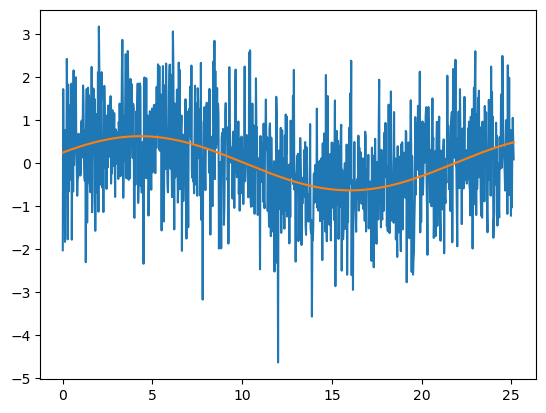

In [4]:
plt.plot(x, data)
plt.plot(x, a_real * np.sin(omega_real*x + phi_real))

In [68]:
sampler = TestSampler(3, lnlike, lnprior, cov_update=100)

In [69]:
sampler.sample(np.array([2, 3, 1]), 100_000, thin=1)

100%|██████████| 99999/99999 [00:12<00:00, 8164.11it/s]


In [70]:
from emcee.autocorr import integrated_time

In [71]:
with open('./chains/chain_1.txt', 'r') as f:
    chain = np.loadtxt(f)

In [72]:
integrated_time(chain[20_000:, 2])

array([14.7352858])

In [73]:
print(omega_real, a_real, phi_real)

0.26905744878187066 0.6296080852552627 0.4083994848953864


(-1.0, 1.0)

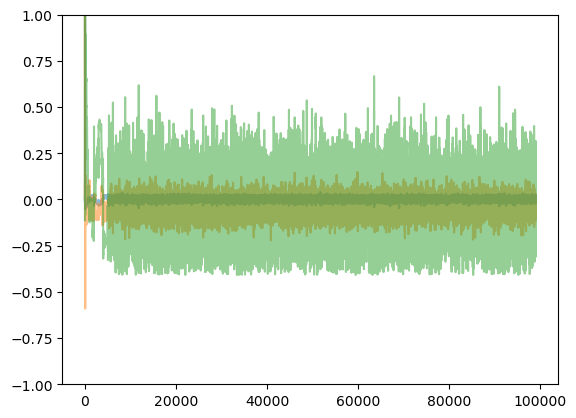

In [74]:
plt.plot(chain[:, 0] - omega_real, alpha = 0.5)
plt.plot(chain[:, 1] - a_real, alpha = 0.5)
plt.plot(chain[:, 2] - phi_real, alpha = 0.5)
plt.ylim([-1, 1])

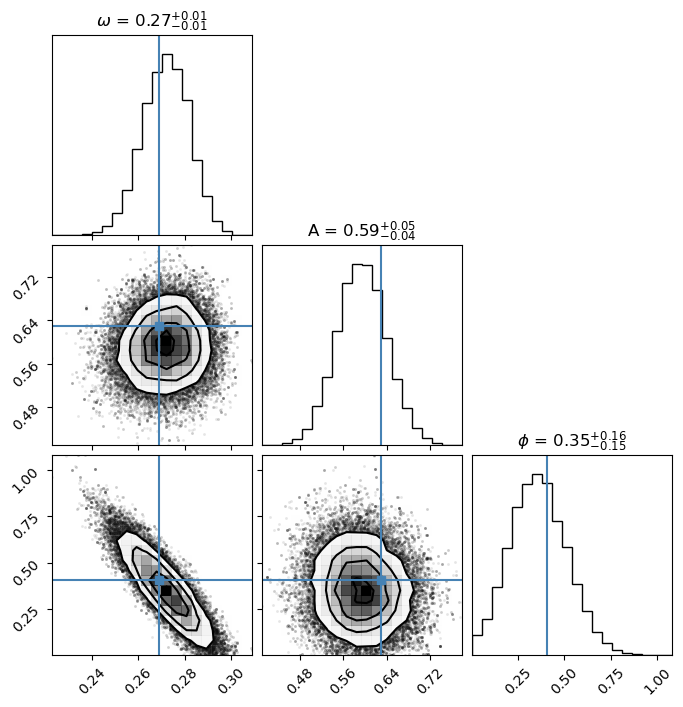

In [76]:
burn = 20_000

corner.corner(chain[burn::1, :3], truths=[omega_real, a_real, phi_real],
              titles=[r'$\omega$', r'A', r'$\phi$'], show_titles=True)
plt.show()